# Project: AI Computer Vision Project with YOLOV
-----

This project aims at developing a small project capable of capturing the movement of each player and ball in a football game. 

**Proposed Architecture**:

1. The raw video is received and splitted into frames
    1. Object detector: finds each player, goalkepeers, refereers and the ball
        1. Tracking: detection for all classes except the ball receives a unique tracking id and is then tracked
            1. Embedding analysis: divide the players in 2 teams (Youmap, KMeans)
    2. Keypoint detector: finds the 32 characteristics points of the footbal field for further use in perspective transformation
        1. Perspective transfomation: create lines projection
    3. Create a radar view of the games which receives info from object detection, embedding analysis and keypoint detection.

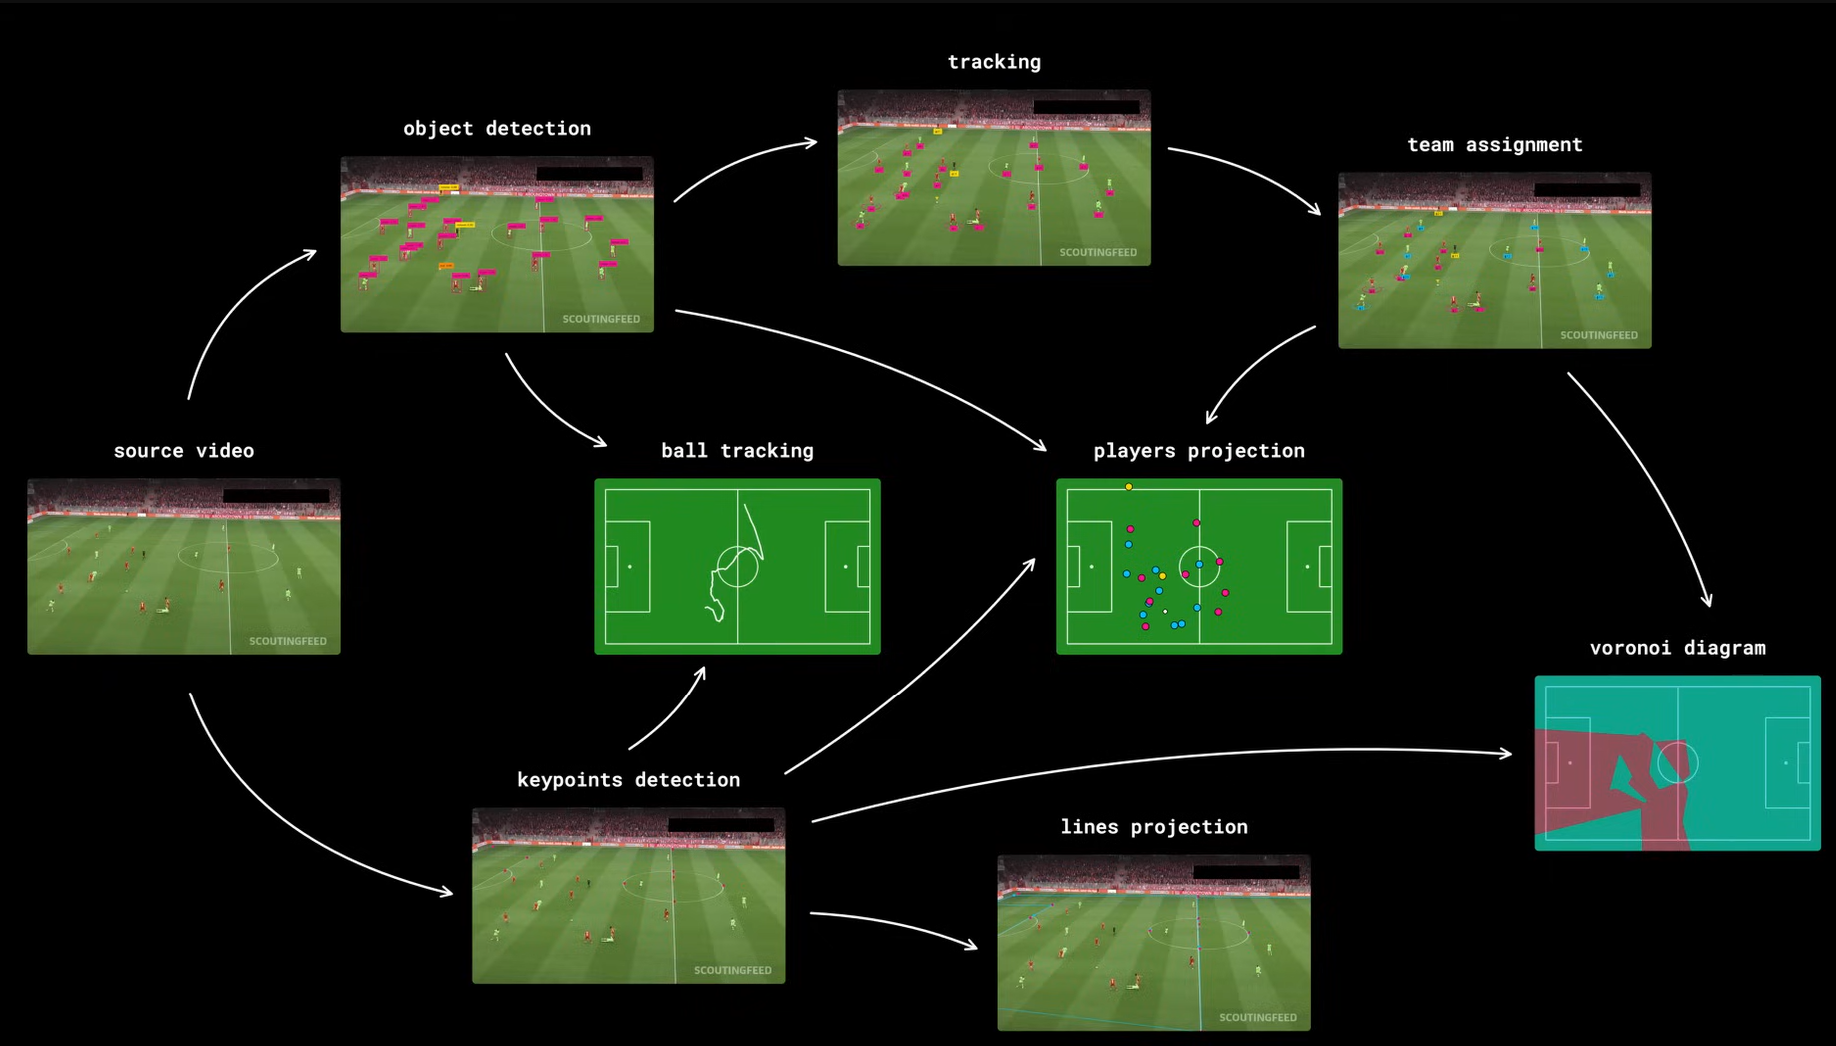

# Prep up
-----

The original dataset was obtained from Kaggle (https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout).

The dataset was then splitted into frames and through Roboflow it was then properlly labeled (https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc).
* A second dataset related to this one is that of keypoint detector which is aimed at the footbal field itself (https://universe.roboflow.com/roboflow-jvuqo/football-field-detection-f07vi)

## Needed API
------
In order to run this project it is a must to have the Roboflow APIs configured.

* Open your Roboflow Settings page. Click Copy. This will place your private key in the clipboard.
* In Colab, go to the left pane and click on Secrets (🔑). Store Roboflow API Key under the name ROBOFLOW_API_KEY.




# Check GPU Active

In [ ]:
# If running on google collab run
# !nvidia-smi
# check if the gpu has been actived otherwise turn it on

In [11]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118

  You can safely remove it manually.



     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------  3.9/4.0 MB 26.0 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 21.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 40.0 MB/s eta 0:01:08
     ---------------------------------------- 0.0/2.7 GB 44.6 MB/s eta 0:01:01
     ---------------------------------------- 0.0/2.7 GB 46.1 MB/s eta 0:00:58
      --------------------------------------- 0.0/2.7 GB 45.9 MB/s eta 0:00:58
      --------------------------------------- 0.1/2.7 GB 48.1 MB/s eta 0:00:56
      --------------------------------------- 0.1/2.7 GB 49.5 MB/s eta 0:00:54
     - -------------------------------------- 0.1/2.7 GB 50.3 MB/s eta 0:00:53
     - -------------------------------------- 0.1/2.7 GB 51.3 MB/s eta 0:00:51
     - -------------------------------------- 0.1/2.7 GB 51.3 MB/s 

In [1]:
import torch
torch.cuda.is_available()

True

# training object detector
----

the training code can be accessed in the following link: https://colab.research.google.com/github/roboflow/sports/blob/main/examples/soccer/notebooks/train_player_detector.ipynb#scrollTo=0BDwugoBDfu7

In [1]:
# Installing dependencies
!pip install -q ultralytics roboflow

In [2]:
!nvidia-smi

Sun Jan  5 00:14:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   59C    P5              7W /   54W |     816MiB /   4096MiB |     36%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [35]:
!pip install requests==2.28.2 rich==13.4.2 setuptools==60.2.0 openxlab==0.1.2


  Using cached requests-2.28.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached rich-13.4.2-py3-none-any.whl.metadata (18 kB)
  Using cached setuptools-60.2.0-py3-none-any.whl.metadata (5.1 kB)
Using cached requests-2.28.2-py3-none-any.whl (62 kB)
Using cached rich-13.4.2-py3-none-any.whl (239 kB)
Using cached setuptools-60.2.0-py3-none-any.whl (953 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.6.0
    Uninstalling setuptools-75.6.0:
      Successfully uninstalled setuptools-75.6.0
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
  Attempting uninstall: rich
    Found existing installation: rich 13.0.1
    Uninstalling rich-13.0.1:
      Successfully uninstalled rich-13.0.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.32.0 requires requests<3.0.0,>=2.32.0, but you have requests 2.28.2 which is incompatible.
inference-gpu 0.32.0 requires rich~=13.0.0, but you have rich 13.4.2 which is incompatible.
inference-gpu 0.32.0 requires setuptools>=70.0.0, but you have setuptools 60.2.0 which is incompatible.


In [4]:
!pip install -q gdown inference-gpu supervision

#gdown -> download file from drive
#inference -> to pull and run models from roboflow
#supervision -> perform plots

  You can safely remove it manually.
  You can safely remove it manually.


In [8]:
!pip install -q git+https://github.com/roboflow/sports.git

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.32.0 requires tokenizers<=0.20.3,>=0.19.0, but you have tokenizers 0.21.0 which is incompatible.


In [7]:
!pip install tokenizers==0.20.3

  Using cached tokenizers-0.20.3-cp310-none-win_amd64.whl.metadata (6.9 kB)
Using cached tokenizers-0.20.3-cp310-none-win_amd64.whl (2.4 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.47.1 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.20.3 which is incompatible.


In [9]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: c:\Users\Felipe\Documents\GitHub\yolov-computer-vision-project\footbal_ai\0bfacc_0.mp4

  0%|          | 0.00/19.9M [00:00<?, ?B/s]
 13%|█▎        | 2.62M/19.9M [00:00<00:00, 23.6MB/s]
 32%|███▏      | 6.29M/19.9M [00:00<00:00, 28.6MB/s]
 47%|████▋     | 9.44M/19.9M [00:00<00:00, 26.3MB/s]
 63%|██████▎   | 12.6M/19.9M [00:00<00:00, 27.5MB/s]
 82%|████████▏ | 16.3M/19.9M [00:00<00:00, 28.0MB/s]
100%|██████████| 19.9M/19.9M [00:00<00:00, 30.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: c:\Users\Felipe\Documents\GitHub\yolov-computer-vision-project\footbal_ai\2e57b9_0.mp4

  0%|          | 0.00/21.1M [00:00<?, ?B/s]
  7%|▋         | 1.57M/21.1M [00:00<00:01, 13.1MB/s]
 37%|███▋      | 7.86M/21.1M [00:00<00:00, 36.8MB/s]
 65%|██████▍   | 13.6M/21.1M [00:00<00:00, 42.4MB/s]
 92%|█████████▏| 19.4M/21.1M [00:00<00:00, 47.0MB/s]
100%|██████████| 21.1M/21.

In [2]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

# ball, player, goalkeeper and referee detection

In [1]:
from inference import get_model

import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

ROBOFLOW_API_KEY = '3OPCw2CJQNcjYDqvDHF4'
PLAYER_DETECTION_MODEL_ID = 'football-players-detection-3zvbc/11'
PLAYER_DETECTION_MODEL = get_model(
    model_id=PLAYER_DETECTION_MODEL_ID,
    api_key=ROBOFLOW_API_KEY
)

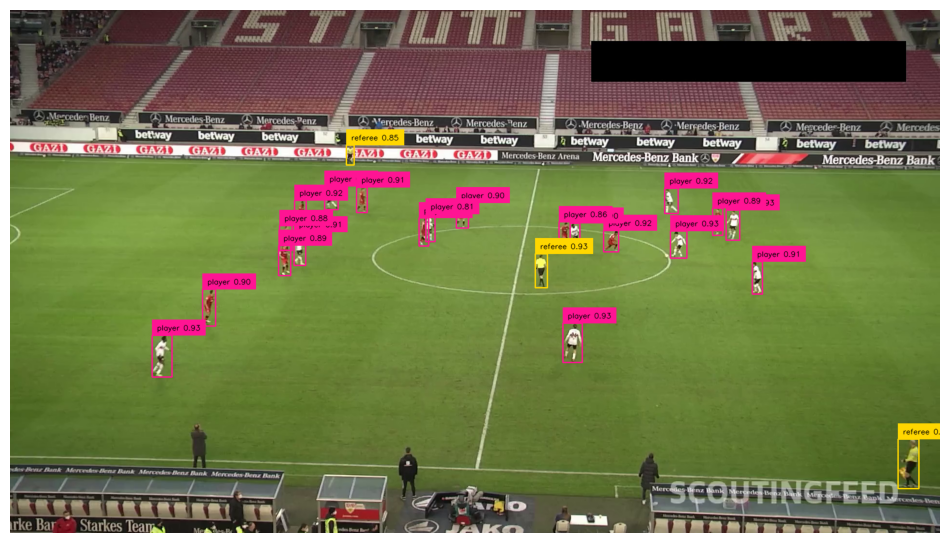

In [2]:
import supervision as sv

SOURCE_VIDEO_PATH = '0bfacc_0.mp4'

#allows to personalize the boxes labels
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    thickness=2
)
#allows to write in the box
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)
#split the video into frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator) #loop over frames of the video

#run model on the frame
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result) #sv.Detections allows to manipulate the results of the model

#customize the label format with extra info
labels = [
    f'{class_name} {confidence:.2f}'
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

#copy the frame to write on it the labels of the model
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels=labels)

sv.plot_image(annotated_frame)

Processing the entire video now...

In [10]:
from tqdm import tqdm #allows to visualize the processing of the frames
import supervision as sv

SOURCE_VIDEO_PATH = '0bfacc_0.mp4'
TARGET_VIDEO_PATH = '0bfacc_0_result_1.mp4' #output video

#allows to personalize the boxes labels
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    thickness=2
)
#allows to write in the box
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

#-------
#In order to have the annotated video have the same fps as original

#allows to get info from video
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
#creating a new instance that allows to save videos in the HD
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

# ------

#split the video into frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)


with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

        #run model on the frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result) #sv.Detections allows to manipulate the results of the model

        #customize the label format with extra info
        labels = [
            f'{class_name} {confidence:.2f}'
            for class_name, confidence
            in zip(detections['class_name'], detections.confidence)
        ]

        #copy the frame to write on it the labels of the model
        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(annotated_frame, detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections, labels=labels)

        video_sink.write_frame(annotated_frame)

100%|██████████| 750/750 [58:28<00:00,  4.68s/it] 


After this the players, referee, goalkeeper and balls will be detect on the video. 

Afterwards we have to track specific players.

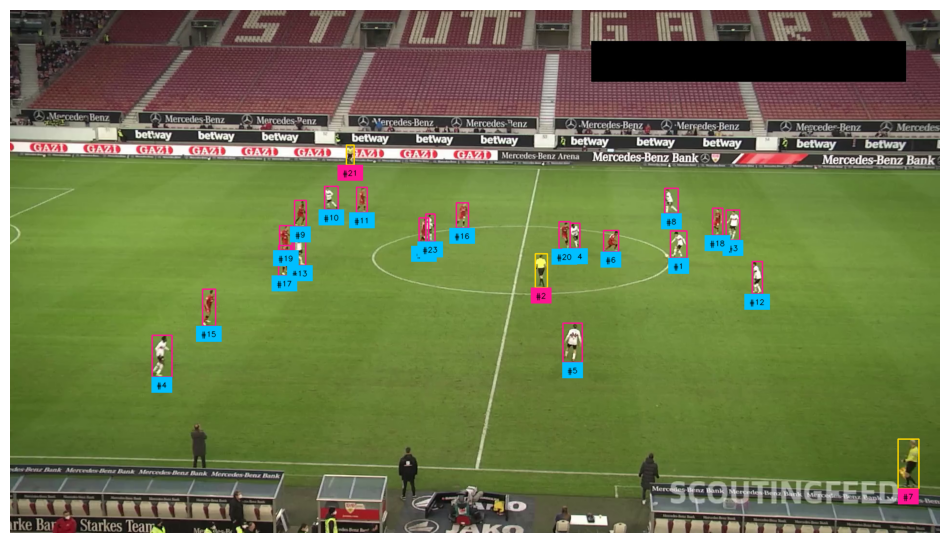

In [3]:
from tqdm import tqdm #allows to visualize the processing of the frames
import supervision as sv

SOURCE_VIDEO_PATH = '0bfacc_0.mp4'
BALL_ID = 0
TARGET_VIDEO_PATH = '0bfacc_0_result_1.mp4' #output video

#allows to personalize the boxes labels
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    thickness=2
)
#allows to write in the box
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)

#----- ADDING TRACKER
tracker = sv.ByteTrack()
tracker.reset()
# ------------------

#allows to get info from video
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
#creating a new instance that allows to save videos in the HD
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)


#split the video into frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

#run model on the frame
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result) #sv.Detections allows to manipulate the results of the model

# -split ball and others detections
ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id = all_detections.class_id - 1
all_detections = tracker.update_with_detections(all_detections)
# ---------------

#-----------------NEW LABEL
labels = [
    f'#{tracker_id}'
    for tracker_id
    in all_detections.tracker_id
]
# ------------------------

#copy the frame to write on it the labels of the model
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

sv.plot_image(annotated_frame)

# Clusterize players into teams

How to create training data for the model? Detect players on different frames and crop them out. 

CLIP is an algorithm of Image Embedding which looks for similar images. Embeddings captures the semantic meaning of an image such as lightning, and look for images that have similar characteristicas. SigLIP is the choice.


After detecting the players, SigLIP will analyze each player and place them in an embedding vector.

UMAP is applied to reduce the dimensions into a 3D space.

KMeans will divide players into two clusters.

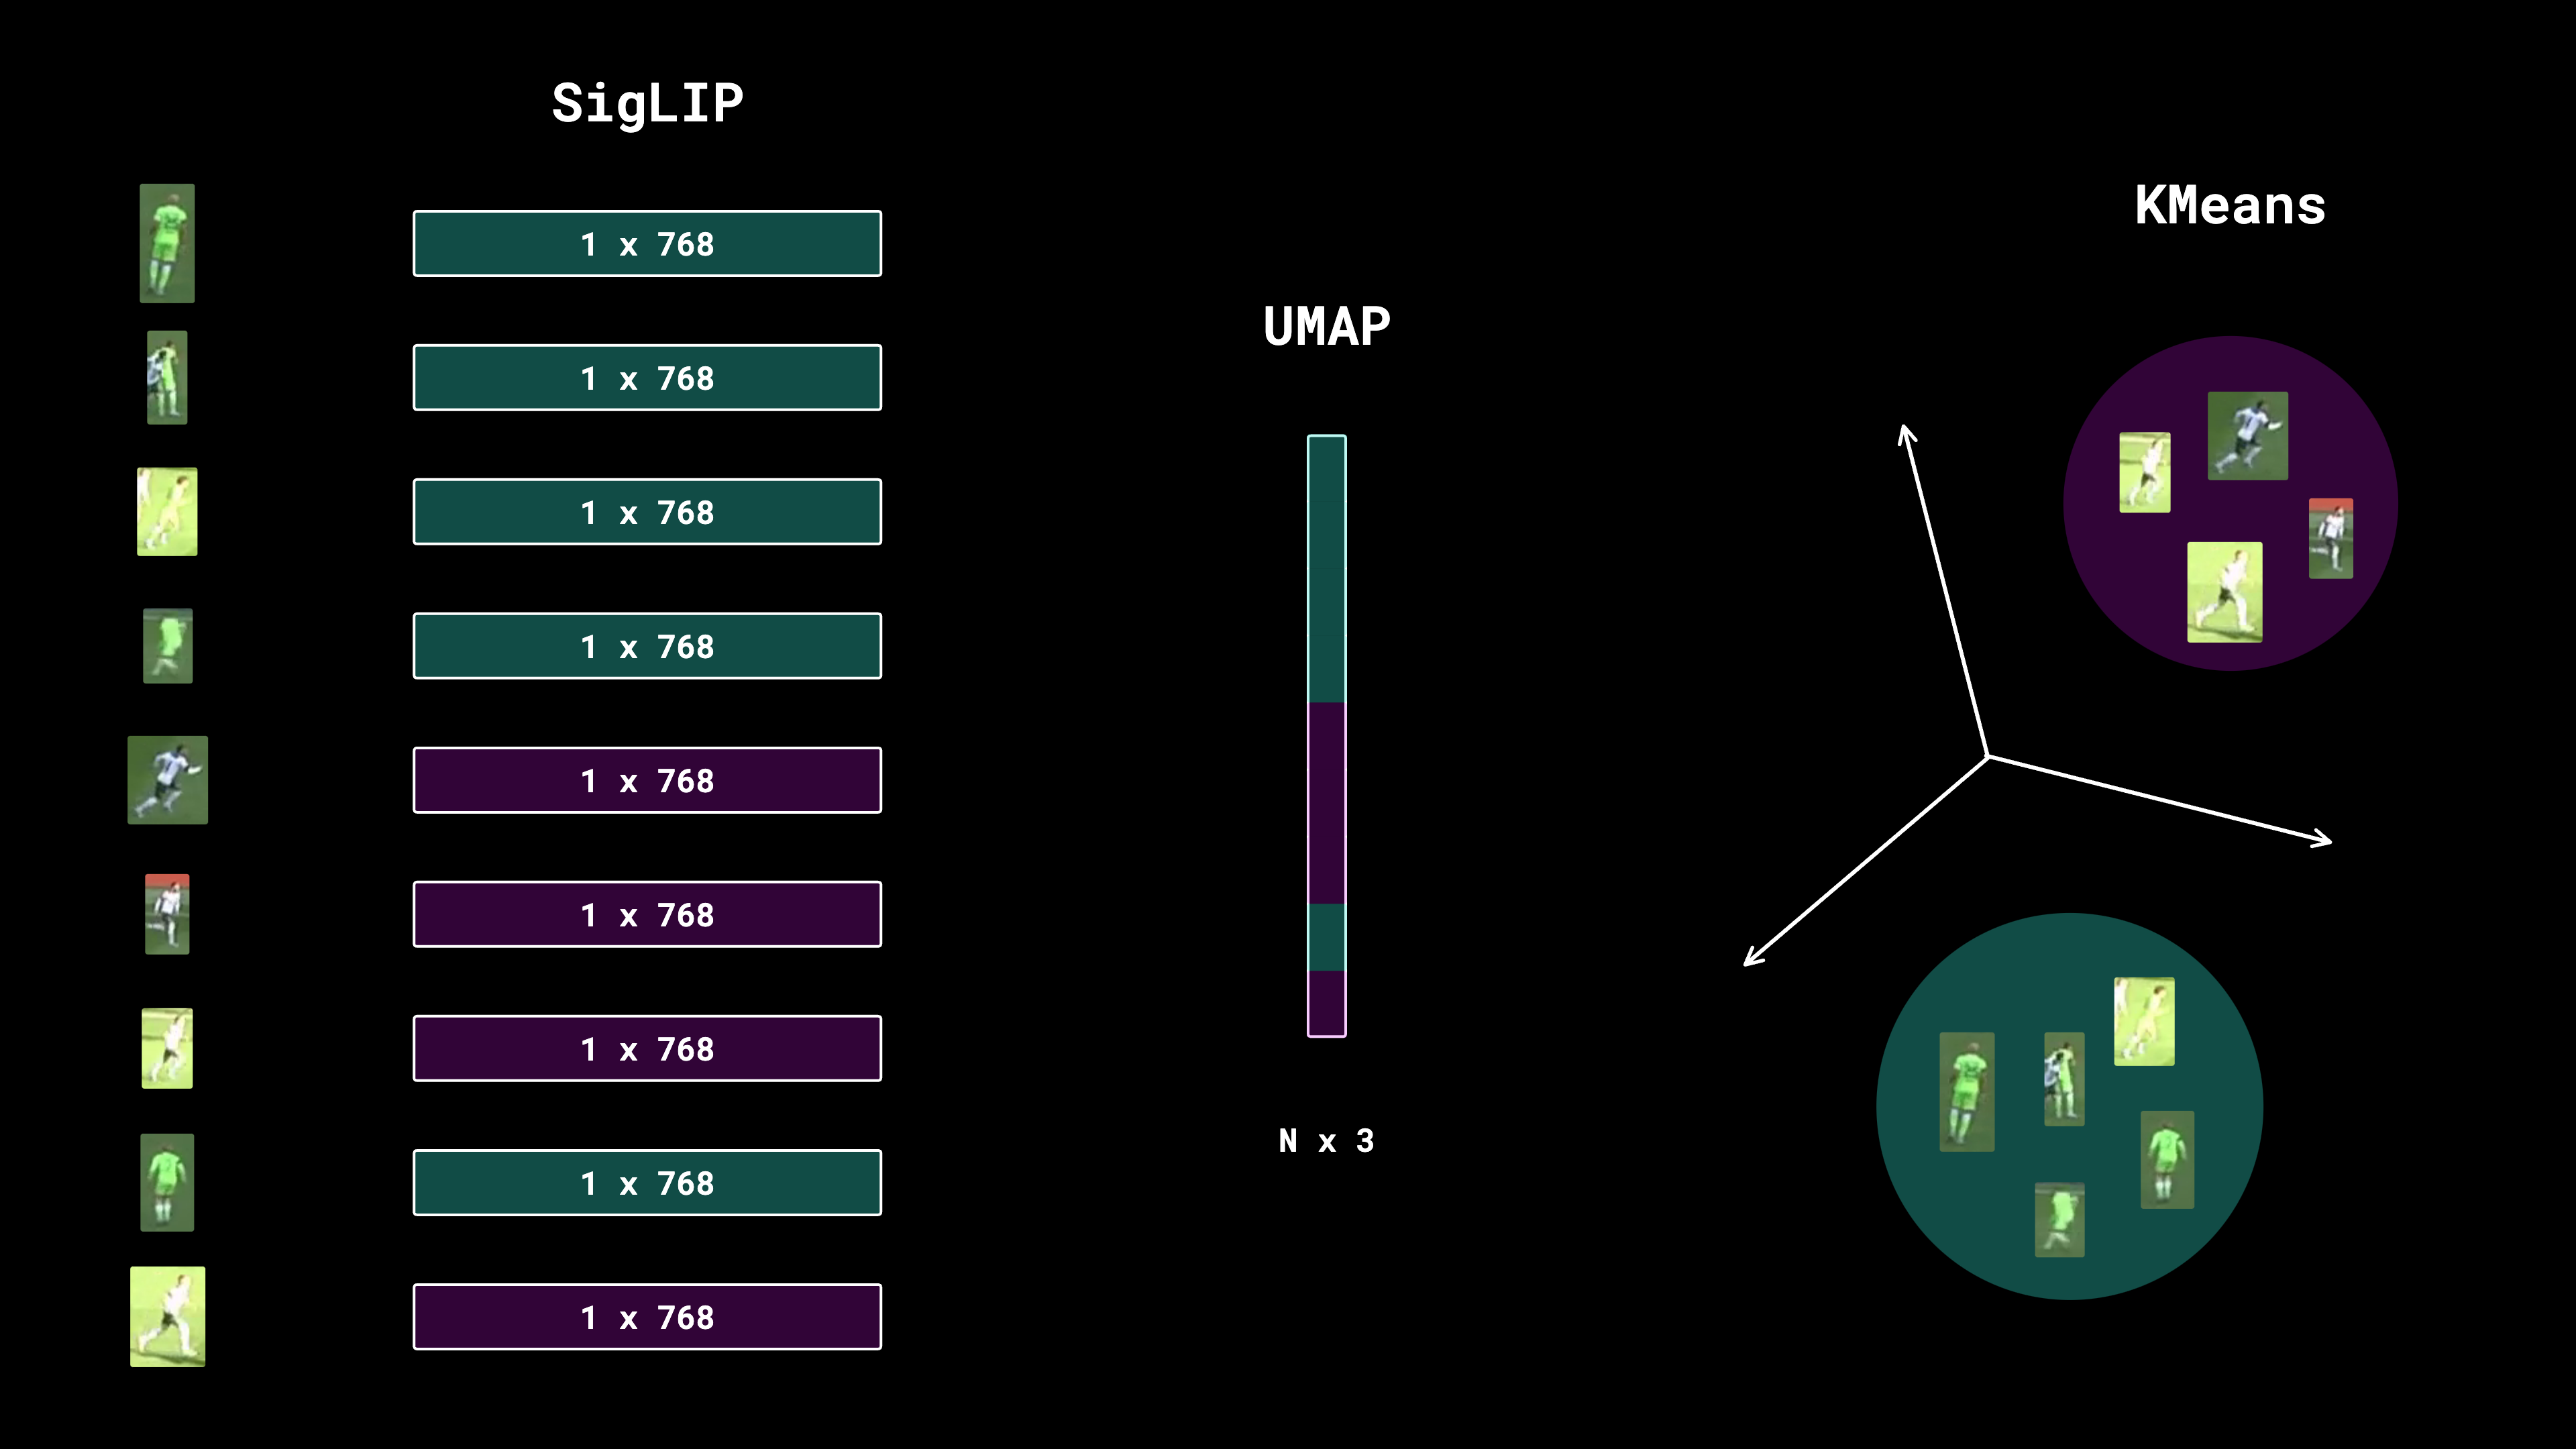

In [4]:
#Collecting a training dataset

#STRIDE makes it so that it keeps every x frames, and returns the x+1 frame

STRIDE = 30
PLAYER_ID = 2

def extract_crops(source_video_path: str):
    frame_generator = sv.get_video_frames_generator(source_video_path, stride=STRIDE)

    crops = []
    for frame in tqdm(frame_generator, desc='collecting crops'):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)
        #adds a threshold of 0.5 to avoid overlapping labels
        detections = detections.with_nms(threshold=0.5, class_agnostic=True)
        detections = detections[detections.class_id == PLAYER_ID]
        crops += [
            sv.crop_image(frame, xyxy)
            for xyxy
            in detections.xyxy
        ]

    return crops

In [5]:
crops = extract_crops(SOURCE_VIDEO_PATH)

collecting crops: 25it [02:10,  5.23s/it]


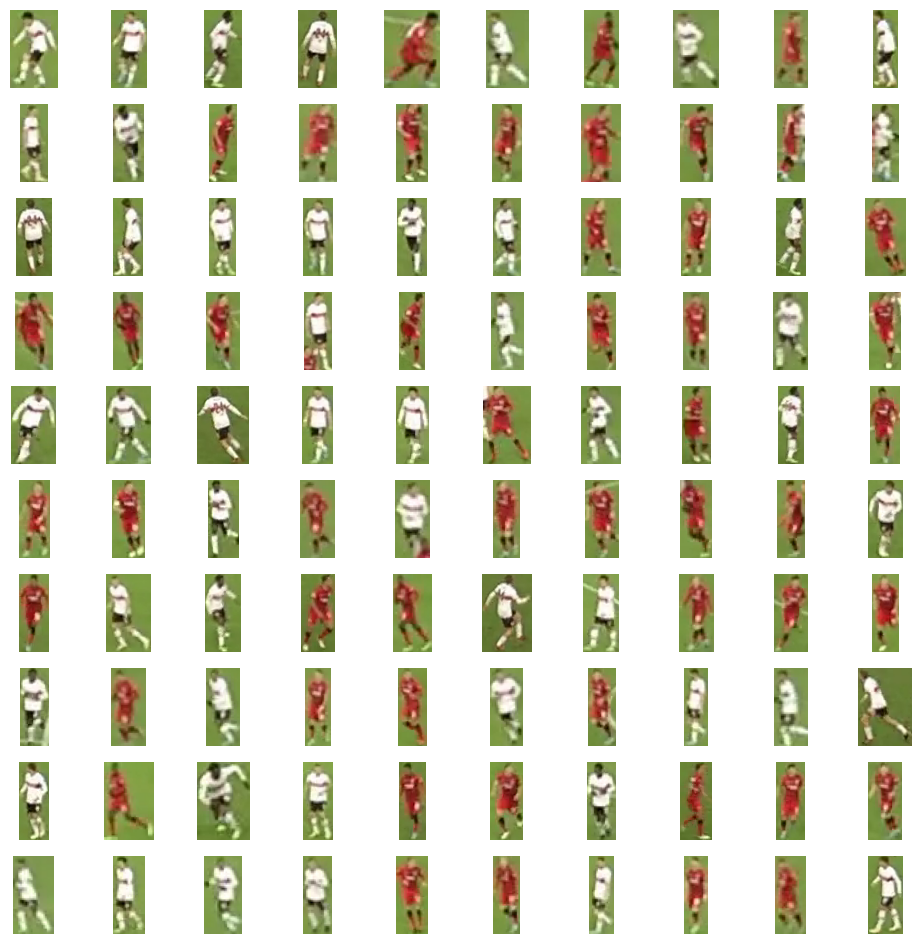

In [6]:
sv.plot_images_grid(crops[:100], grid_size=(10,10))

In [7]:
# Now it is needed to sort the players into two teams

import torch
'''
# the transformers lib provides framework for NLP and CV tasks
# it works with easy apis to load, fine tuse and use models
# also supports gpu and cpu
# AutoProcessor is an utility designed to load appropriate preprocessing tool
# like tokenizer for text and feature extractor for images
# it ensures that the input images are processed compatible with siglip model

The siglipvisionmodel is part of siglip architecture
It is designed for vision tasks like class, object detection and embedding
It outputs embeddings (numerical representations) of images
'''

from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

In [25]:
!pip install more_itertools

In [8]:
#convert crops from opencv to siglip format
from more_itertools import chunked
import numpy as np
BATCH_SIZE = 32

# supervision uses opencv so they need to be converted
crops = [sv.cv2_to_pillow(crop) for crop in crops] #list comprehension func that does it
batches = chunked(crops, BATCH_SIZE) #split the crops into batches
data = []


with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        #processor is responsible for preprocessing the data for the model
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors='pt').to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        # the embeddings are located in the last_hidden_state
        # although it has multiple dimensions
        # in order to get a single column, we use average acrross dimensions
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 16it [00:31,  1.98s/it]


In [28]:
data.shape

(488, 768)

In [50]:
!pip install umap-learn

  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)


Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)


In [9]:
import umap.umap_ as mp
from sklearn.cluster import KMeans

#use umap to reduce the dimensions to a 3D space
REDUCER = mp.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2) #clusterize in 2 teams

#applying the reducer into the input data
projections = REDUCER.fit_transform(data)
clusters = CLUSTERING_MODEL.fit_predict(projections)

#splitting
team_0 = [
    crop 
    for crop, cluster in 
    zip(crops,clusters) 
    if cluster == 0
]

team_1 = [
    crop 
    for crop, cluster in 
    zip(crops,clusters) 
    if cluster == 1
]

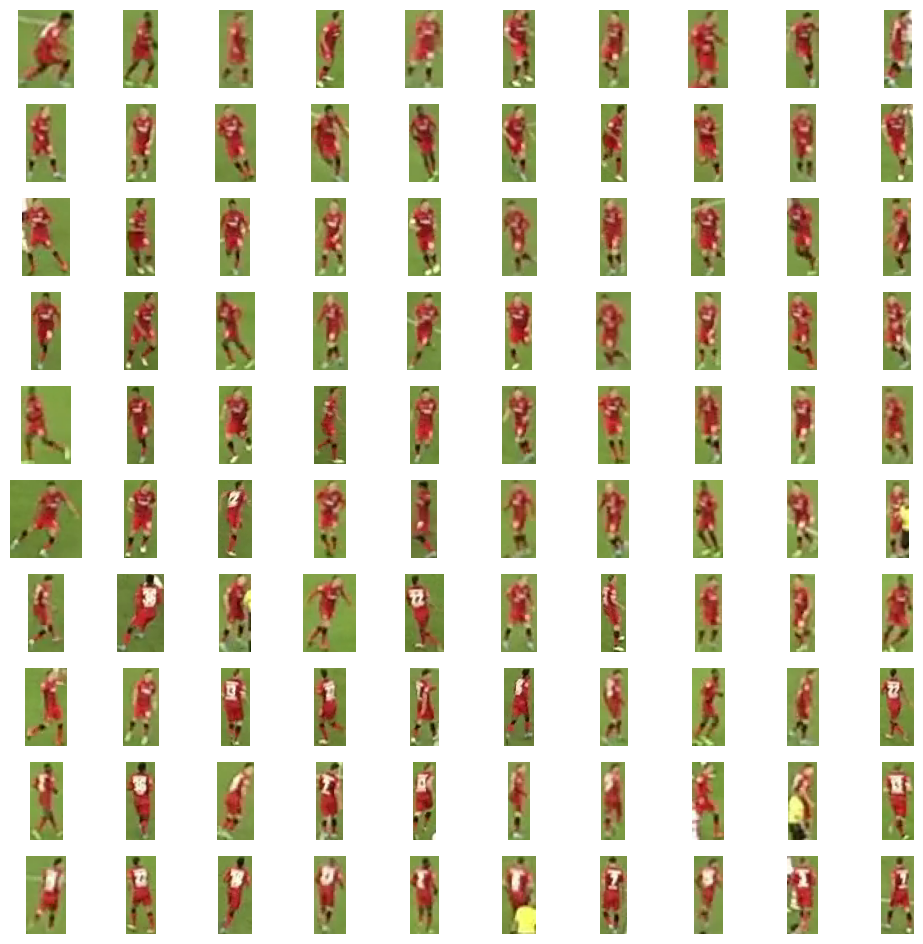

In [10]:
sv.plot_images_grid(team_0[:100], grid_size=(10,10))

In [ ]:
# Instead of running the entire KMeans code to classify each team
# The TeamClassifier within sports can be used instead
from sports.common.team import TeamClassifier

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClasssifier(device=DEVICE)
team_classifier.fit(crops)


In [57]:
def resolve_goalkeeper_team_id(players_detections: sv.Detections, 
                               goalkeepers_detections: sv.Detections):
    
    goalkeepers_xy = goalkeepers_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)

    team_0_centroid = players_xy[players_detections.class_id == 0].mean(axis=0)
    team_1_centroid = players_xy[players_detections.class_id == 1].mean(axis=0)

    goalkeepers_team_ids = []
    for goalkeeper_xy in goalkeepers_xy:
        dist_0 = np.linalg.norm(goalkeepers_xy - team_0_centroid)
        dist_1 = np.linalg.norm(goalkeepers_xy - team_1_centroid)
        goalkeepers_team_ids.append(0 if dist_0 < dist_1 else 1)

    return np.array(goalkeepers_team_ids)

resolve_goalkeeper_team_id(player_detections, goalkeeper_detections)

array([], dtype=float64)

In [59]:
goalkeeper_detections

Detections(xyxy=array([], shape=(0, 4), dtype=float64), mask=None, confidence=array([], dtype=float64), class_id=array([], dtype=float64), tracker_id=array([], dtype=int32), data={'class_name': array([], dtype='<U7')}, metadata={})

Embedding extraction: 1it [00:01,  1.25s/it]


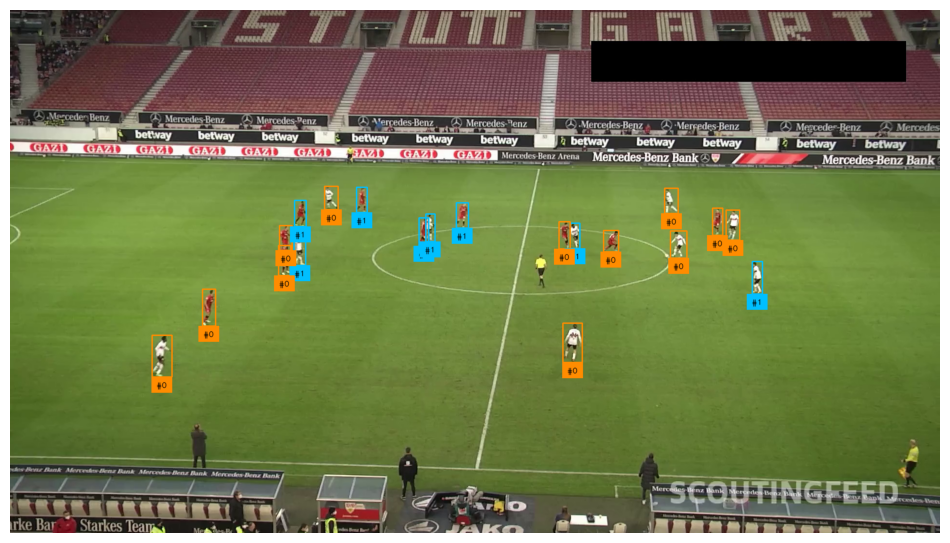

In [60]:

from sports.common.team import TeamClassifier
from tqdm import tqdm #allows to visualize the processing of the frames
import supervision as sv

SOURCE_VIDEO_PATH = '0bfacc_0.mp4'
TARGET_VIDEO_PATH = '0bfacc_0_result_1.mp4' #output video
PLAYER_ID = 2
GOALKEEPER_ID = 1
BALL_ID = 0

# -------
# Instead of running the entire KMeans code to classify each team
# The TeamClassifier within sports can be used instead
# crops = extract_crops(SOURCE_VIDEO_PATH)
# team_classifier = TeamClassifier(device=DEVICE)
# team_classifier.fit(crops)
# -------

#allows to personalize the boxes labels
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    thickness=2
)
#allows to write in the box
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)

#----- ADDING TRACKER
tracker = sv.ByteTrack()
tracker.reset()
# ------------------

#allows to get info from video
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

#split the video into frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

#run model on the frame
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result) #sv.Detections allows to manipulate the results of the model

# -split ball and others detections
ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(all_detections)

# -------------- NEW TRACKER
# filtering players, cropping them out and getting their team classification
player_detections = all_detections[all_detections.class_id == PLAYER_ID]

players_crops = [sv.crop_image(frame, xyxy) for xyxy in player_detections.xyxy]
player_detections.class_id = team_classifier.predict(players_crops)


#-----------------NEW LABEL
labels = [
    f'#{tracker_id}'
    for tracker_id
    in player_detections.class_id #replace all_detections by player_detections
]
# ------------------------

#copy the frame to write on it the labels of the model
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, player_detections)
annotated_frame = label_annotator.annotate(annotated_frame, player_detections, labels=labels)

sv.plot_image(annotated_frame)

#Now instead of getting player ID, we will get team ids

now we must expand into all other categories

collecting crops: 0it [00:00, ?it/s]

collecting crops: 25it [02:09,  5.16s/it]
Embedding extraction: 15it [00:30,  2.06s/it]
Embedding extraction: 1it [00:01,  1.25s/it]


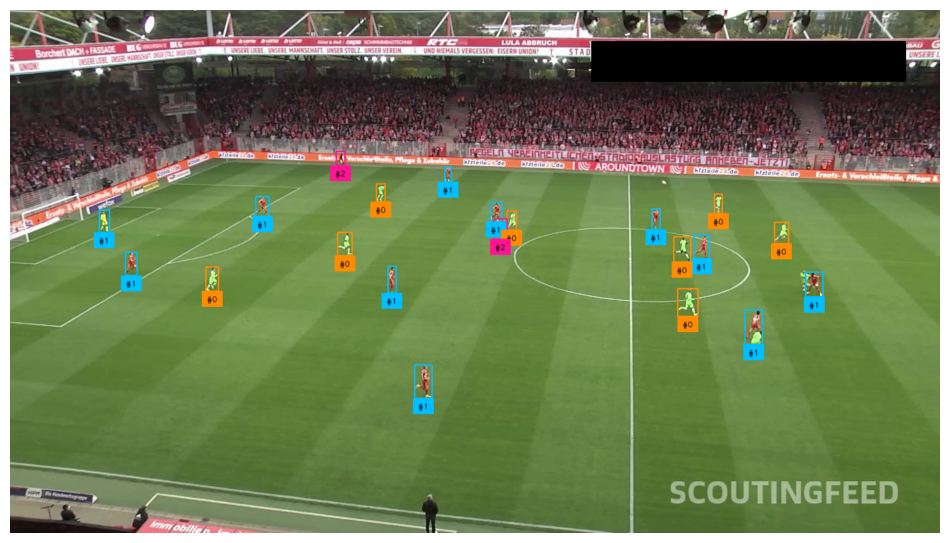

In [61]:

from sports.common.team import TeamClassifier
from tqdm import tqdm #allows to visualize the processing of the frames
import supervision as sv

SOURCE_VIDEO_PATH = '121364_0.mp4'
TARGET_VIDEO_PATH = '121364_0_result_1.mp4' #output video
PLAYER_ID = 2
GOALKEEPER_ID = 1
REFEREE_ID = 3
BALL_ID = 0

# -------
# Instead of running the entire KMeans code to classify each team
# The TeamClassifier within sports can be used instead
crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)
# -------

#allows to personalize the boxes labels
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    thickness=2
)
#allows to write in the box
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)

#----- ADDING TRACKER
tracker = sv.ByteTrack()
tracker.reset()
# ------------------

#allows to get info from video
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

#split the video into frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

#run model on the frame
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result) #sv.Detections allows to manipulate the results of the model

# -split ball and others detections
ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(all_detections)

# -------------- NEW TRACKER
# filtering players, cropping them out and getting their team classification
player_detections = all_detections[all_detections.class_id == PLAYER_ID]
goalkeeper_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

players_crops = [sv.crop_image(frame, xyxy) for xyxy in player_detections.xyxy]
player_detections.class_id = team_classifier.predict(players_crops)

goalkeeper_detections.class_id = resolve_goalkeeper_team_id(player_detections, goalkeeper_detections)
referees_detections.class_id -= 1

all_detections = sv.Detections.merge([player_detections, goalkeeper_detections, referees_detections])

#-----------------NEW LABEL
labels = [
    f'#{tracker_id}'
    for tracker_id
    in all_detections.class_id #replace all_detections by player_detections
]
# ------------------------

all_detections.class_id = all_detections.class_id.astype(int)

#copy the frame to write on it the labels of the model
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, all_detections)
annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

sv.plot_image(annotated_frame)

#Now instead of getting player ID, we will get team ids

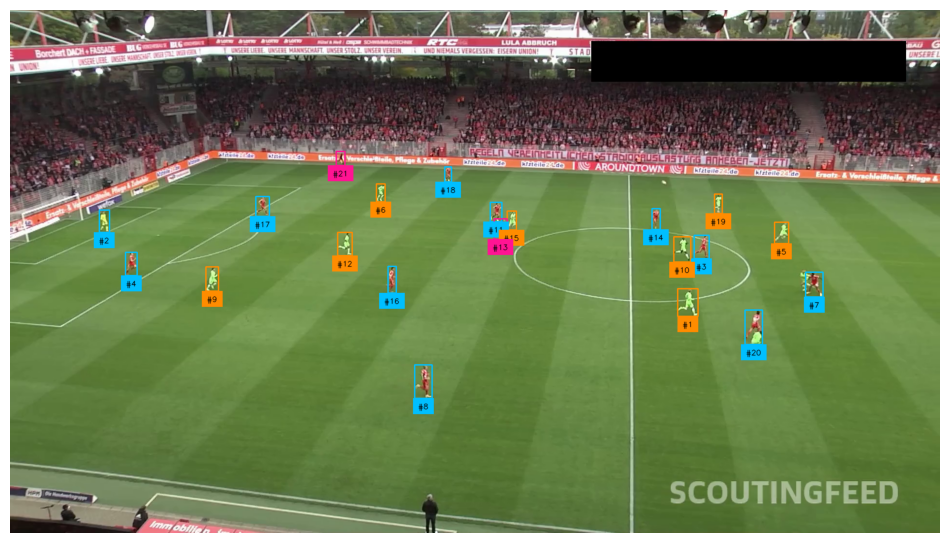

In [62]:
labels = [
    f'#{tracker_id}'
    for tracker_id
    in all_detections.tracker_id #replace all_detections by player_detections
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, all_detections)
annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

sv.plot_image(annotated_frame)

now the last step is to apply the previous concepts on the rest of the video

In [63]:
from tqdm import tqdm #allows to visualize the processing of the frames
import supervision as sv

SOURCE_VIDEO_PATH = '121364_0.mp4'
TARGET_VIDEO_PATH = '121364_0_result_1.mp4' #output video
PLAYER_ID = 2
GOALKEEPER_ID = 1
REFEREE_ID = 3
BALL_ID = 0

#allows to personalize the boxes labels
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    thickness=2
)
#allows to write in the box
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00','#00BFFF','#FF1493','#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)

#-------
#In order to have the annotated video have the same fps as original

#allows to get info from video
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
#creating a new instance that allows to save videos in the HD
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

# ------

#split the video into frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

        #run model on the frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result) #sv.Detections allows to manipulate the results of the model

        # -split ball and others detections
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections = tracker.update_with_detections(all_detections)

        # -------------- NEW TRACKER
        # filtering players, cropping them out and getting their team classification
        player_detections = all_detections[all_detections.class_id == PLAYER_ID]
        goalkeeper_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
        referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

        players_crops = [sv.crop_image(frame, xyxy) for xyxy in player_detections.xyxy]
        player_detections.class_id = team_classifier.predict(players_crops)

        goalkeeper_detections.class_id = resolve_goalkeeper_team_id(player_detections, goalkeeper_detections)
        referees_detections.class_id -= 1

        all_detections = sv.Detections.merge([player_detections, goalkeeper_detections, referees_detections])

        #-----------------NEW LABEL
        labels = [
            f'#{tracker_id}'
            for tracker_id
            in all_detections.class_id #replace all_detections by player_detections
        ]
        # ------------------------

        all_detections.class_id = all_detections.class_id.astype(int)

        #copy the frame to write on it the labels of the model
        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

        video_sink.write_frame(annotated_frame)

  0%|          | 0/750 [00:00<?, ?it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:01,  1.17s/it]
  0%|          | 1/750 [00:06<1:24:50,  6.80s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:01,  1.14s/it]
  0%|          | 2/750 [00:13<1:24:14,  6.76s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:01,  1.14s/it]
  0%|          | 3/750 [00:19<1:22:15,  6.61s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:01,  1.24s/it]
  1%|          | 4/750 [00:26<1:21:59,  6.59s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:01,  1.23s/it]
  1%|          | 5/750 [00:32<1:20:33,  6.49s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:01,  1.22s/it]
  1%|          | 6/750 [00:39<1:19:30,  6.41s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:01,  1.15s/it]
  1%|          | 7/750 [00:45<1:18:49,  6.36s/it]
Embeddin